In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *

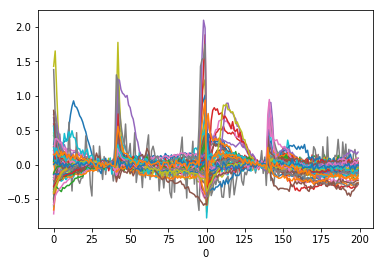

In [2]:
initial = pd.read_csv(r"data\\190819_file24_concat.csv", index_col=0, header=None).T
initial.T.plot(legend=False)

In [3]:
initial = frameToSecDF(initial)

In [5]:
df = removeLowSTD(initial, 10)
df

,0.0,0.37453183520599254,0.7490636704119851,1.1235955056179776,1.4981273408239701,1.8726591760299627,2.247191011235955,2.6217228464419478,2.9962546816479403,3.370786516853933,...,71.16104868913858,71.53558052434457,71.91011235955057,72.28464419475655,72.65917602996255,73.03370786516854,73.40823970037454,73.78277153558052,74.15730337078652,74.53183520599251
5,-0.406185,0.049042,0.223303,0.310755,0.273653,0.322463,0.270237,0.289675,0.217254,0.223146,...,-0.087267,-0.102270,-0.088442,-0.120767,-0.097628,-0.099681,-0.109340,-0.100381,-0.112223,-0.146520
6,-0.491532,-0.242878,-0.172337,-0.046181,-0.022043,0.008252,-0.002097,0.047246,0.073609,0.025948,...,-0.147970,-0.121380,-0.139929,-0.118718,-0.153542,-0.143904,-0.091643,-0.125647,-0.102496,-0.104305
7,-0.712955,-0.395644,-0.257366,-0.176899,-0.058378,0.029430,0.097120,0.162038,0.212004,0.181956,...,-0.163295,-0.204561,-0.243606,-0.232796,-0.233837,-0.235268,-0.229560,-0.227804,-0.208095,-0.210606
8,-0.508001,-0.175635,-0.104859,-0.063473,-0.038040,-0.038478,-0.044894,-0.021612,-0.026005,-0.034017,...,-0.087562,-0.110684,-0.132727,-0.093640,-0.131504,-0.135890,-0.120205,-0.144377,-0.095987,-0.111213
9,-0.474422,-0.267464,-0.289981,-0.203153,-0.206636,-0.184895,-0.130857,-0.138437,-0.116137,-0.172102,...,-0.144269,-0.138267,-0.115335,-0.095760,-0.114834,-0.185995,-0.147181,-0.152166,-0.139313,-0.146945
15,0.418318,0.380339,0.249922,0.245061,0.182866,0.143012,0.111600,0.109344,0.093987,0.060562,...,-0.000335,0.007897,-0.008857,-0.021945,0.009515,-0.035124,-0.030948,-0.031321,-0.011874,-0.016474
19,1.425565,1.647967,1.041906,0.504385,0.284658,0.126463,0.077546,-0.001170,0.108221,-0.000581,...,0.060888,0.052790,-0.001637,0.044187,0.074897,0.050833,0.079401,0.030175,0.093506,0.030236
20,-0.610045,0.150345,0.168552,0.358275,0.219205,0.299124,0.240415,0.451521,0.337347,0.351543,...,-0.085957,-0.029628,-0.048719,0.013427,-0.137858,0.014564,-0.032112,-0.134096,0.077109,-0.079995
21,0.673972,0.510013,0.278945,0.312711,0.139685,0.196465,0.105689,0.009324,0.133405,0.094569,...,0.070971,0.060807,0.090424,0.104607,0.152882,0.061943,0.058731,0.028581,0.077364,0.090773
24,0.590192,0.410056,0.361572,0.185089,0.208509,0.085347,0.100640,0.055411,0.068063,0.012288,...,-0.096073,-0.092846,-0.107160,-0.127794,-0.040307,-0.079623,-0.100908,-0.061099,-0.068341,-0.073800


In [6]:
from sklearn.decomposition import PCA

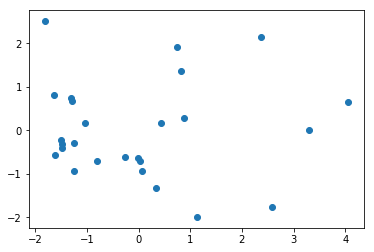

In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

[[-1.51077757  1.18989561]
 [ 3.67409971  0.32930654]
 [ 1.86078043 -1.87944352]
 [ 0.20833671 -0.53840671]
 [-1.3042234  -0.41421101]
 [ 1.31626007  1.80774219]]
[4 0 0 0 4 5 2 3 2 5 1 0 4 1 3 4 4 5 3 3 3 4 4 4 3 3]


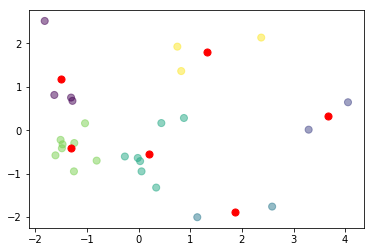

In [8]:
# https://datatofish.com/k-means-clustering-python/
nc = 6
kmeans = KMeans(n_clusters=nc).fit(principalDf)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [9]:
l = []
for i in range(nc):
    temp = []
    for j in range(len(labels)):
        if labels[j] == i:
            temp += [j + 1]
    l += [temp]
l

[[2, 3, 4, 12],
 [11, 14],
 [7, 9],
 [8, 15, 19, 20, 21, 25, 26],
 [1, 5, 13, 16, 17, 22, 23, 24],
 [6, 10, 18]]

52

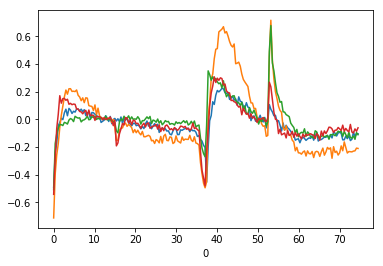

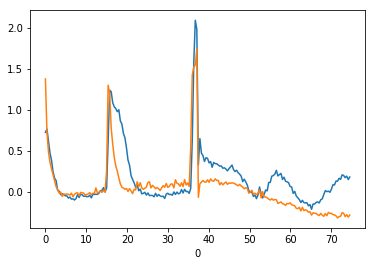

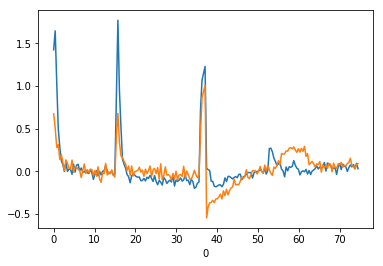

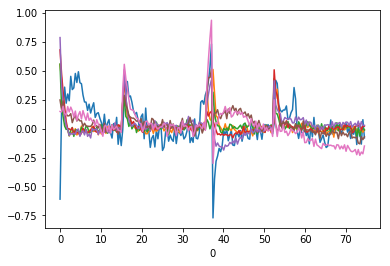

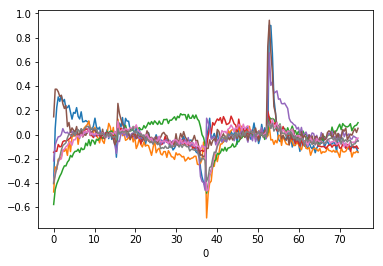

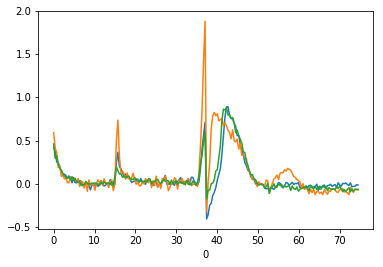

In [22]:
d = df
for i in range(len(l)):
    df1 = d.T[[rows[j - 1] for j in l[i]]]
    df1.plot(legend=False)